In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [56]:
X, y = make_blobs(10000, centers=4, random_state=42)

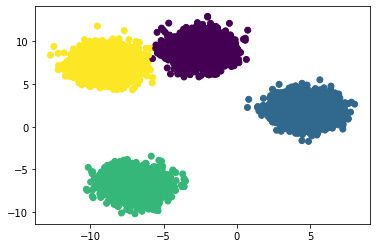

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [73]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1, 1)).todense()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [99]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation="sigmoid", name="l1"))
model.add(Dense(4, activation="softmax", name="l2"))

In [100]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 5)                 15        
_________________________________________________________________
l2 (Dense)                   (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [102]:
outcome = model.fit(X_train, y_train, epochs=10)

Train on 6700 samples
Epoch 1/10
6700/6700 [==============================] - 1s 168us/sample - loss: 1.1825 - accuracy: 0.4600
Epoch 2/10
6700/6700 [==============================] - 1s 87us/sample - loss: 0.8722 - accuracy: 0.7510s - loss: 0.979
Epoch 3/10
6700/6700 [==============================] - 0s 67us/sample - loss: 0.6494 - accuracy: 0.8896
Epoch 4/10
6700/6700 [==============================] - 0s 72us/sample - loss: 0.4746 - accuracy: 0.9988
Epoch 5/10
6700/6700 [==============================] - 0s 69us/sample - loss: 0.3609 - accuracy: 0.9993
Epoch 6/10
6700/6700 [==============================] - 1s 75us/sample - loss: 0.2845 - accuracy: 0.9996
Epoch 7/10
6700/6700 [==============================] - 1s 91us/sample - loss: 0.2303 - accuracy: 0.9996s - loss: 0.250
Epoch 8/10
6700/6700 [==============================] - 1s 143us/sample - loss: 0.1904 - accuracy: 0.9996
Epoch 9/10
6700/6700 [==============================] - 1s 82us/sample - loss: 0.1599 - accuracy: 0.9994
E

In [106]:
model.evaluate(X_test, y_test, verbose=0)

[0.12758132150678925, 0.9987879]

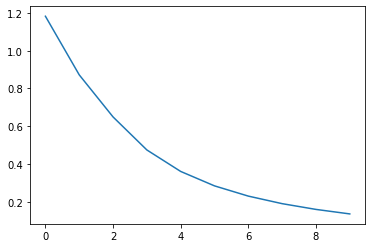

In [107]:
plt.plot(outcome.history["loss"])

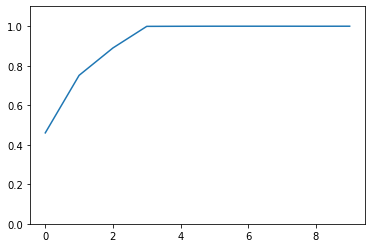

In [113]:
plt.figure()
plt.plot(outcome.history["accuracy"])
plt.ylim(0, 1.1)
plt.show()

In [111]:
X_test[0].shape

(2,)